In [1]:
from keras.datasets import fashion_mnist

In [2]:
(trainX,trainY),(testX,testY)=fashion_mnist.load_data()

In [3]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
testX.shape
trainX.shape

(60000, 28, 28)

In [9]:
import pandas as pd
pd.value_counts(trainY)
classes=np.unique(trainY)
nClasses=len(classes)
nClasses

10

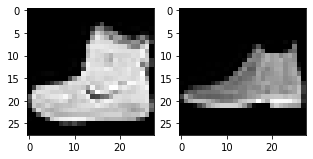

In [15]:
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(trainX[0,:,:],cmap='gray')
plt.subplot(122)
plt.imshow(testX[0,:,:],cmap='gray')

In [18]:
#이미지 데이터 전처리
"""
그레이 이미지 : 0~255, 28*28 -> 28*28*1
"""
trainX=trainX.reshape(-1,28,28,1)
testX=testX.reshape(-1,28,28,1)

In [20]:
trainX.shape

(60000, 28, 28, 1)

In [23]:
trainX=trainX.astype('float32')
testX=testX.astype('float32')

In [24]:
trainX=trainX/255
testX=testX/255

In [26]:
trainY
trainYoneHot=to_categorical(trainY)
testYoneHot=to_categorical(testY)

In [27]:
#6만건 트레이닝 데이터 -> 80%(트레이닝),20%(검증)
from sklearn.model_selection import train_test_split

In [28]:
trainX,validX,trainLabel,validLabel=
train_test_split(trainX,trainYoneHot,
                 test_size=0.2,
                 random_state=2020)

In [30]:
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [67]:
batch_size=64 #모델 갱신 단위, 64개 이미지 트레이닝할 때마다 가중치 업데이트
epochs=20
num_classes=10

In [45]:
fModel=Sequential() #모델 생성

#activation:활성화 함수(linear,relu,sigmoid,softmax)
#linear:디폴트값, 입력값*가중치로 계산된 결과가 그대로 출력->LeakyReLU->
#9*32=>288+32=320
fModel.add(Conv2D(32, kernel_size=(3,3), 
                  activation='linear',padding='same',
                  input_shape=(28,28,1))) #모델에 컨볼루셔널 계층을 추가
fModel.add(LeakyReLU(alpha=0.1)) #비선형 의사 결정
fModel.add(MaxPooling2D((2,2), padding='same'))

fModel.add(Conv2D(64, kernel_size=(3,3), 
                  activation='linear',padding='same')) #모델에 컨볼루셔널 계층을 추가
fModel.add(LeakyReLU(alpha=0.1)) #비선형 의사 결정
fModel.add(MaxPooling2D(pool_size=(2,2),padding='same'))

fModel.add(Conv2D(128, kernel_size=(3,3), 
                  activation='linear',padding='same')) #모델에 컨볼루셔널 계층을 추가
fModel.add(LeakyReLU(alpha=0.1)) #비선형 의사 결정
fModel.add(MaxPooling2D((2,2), padding='same'))

fModel.add(Flatten())

fModel.add(Dense(128, activation='linear'))
fModel.add(LeakyReLU(alpha=0.1)) #비선형 의사 결정

fModel.add(Dense(num_classes, activation='softmax'))

In [46]:
fModel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 128)        

In [51]:
fModel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
fTrain=fModel.fit(trainX,trainLabel,batch_size=batch_size,epochs=epochs,validation_data=(validX,validLabel))

Epoch 1/20
750/750 [==============================] - 34s 45ms/step - loss: 0.4704 - accuracy: 0.8304 - val_loss: 0.3184 - val_accuracy: 0.8835
Epoch 2/20
750/750 [==============================] - 33s 44ms/step - loss: 0.2933 - accuracy: 0.8922 - val_loss: 0.2744 - val_accuracy: 0.9011
Epoch 3/20
750/750 [==============================] - 35s 47ms/step - loss: 0.2412 - accuracy: 0.9112 - val_loss: 0.2586 - val_accuracy: 0.9047
Epoch 4/20
750/750 [==============================] - 35s 47ms/step - loss: 0.2067 - accuracy: 0.9240 - val_loss: 0.2506 - val_accuracy: 0.9113
Epoch 5/20
750/750 [==============================] - 37s 49ms/step - loss: 0.1832 - accuracy: 0.9318 - val_loss: 0.2341 - val_accuracy: 0.9189
Epoch 6/20
750/750 [==============================] - 35s 47ms/step - loss: 0.1555 - accuracy: 0.9422 - val_loss: 0.2405 - val_accuracy: 0.9177
Epoch 7/20
750/750 [==============================] - 36s 48ms/step - loss: 0.1351 - accuracy: 0.9506 - val_loss: 0.2626 - val_accuracy:

In [53]:
testEval=fModel.evaluate(testX,testYoneHot)
print("Cost:", testEval[0])
print("Accuracy:", testEval[1])
#92% 정확도

313/313 [==============================] - 2s 7ms/step - loss: 0.4543 - accuracy: 0.9210
Cost: 0.4542600214481354
Accuracy: 0.9210000038146973


In [57]:
accuracy=fTrain.history['accuracy']
val_accuracy=fTrain.history['val_accuracy']
loss=fTrain.history['loss']
val_loss=fTrain.history['val_loss']
epochs=range(len(accuracy))

In [60]:
val_accuracy

[0.8834999799728394,
 0.9010833501815796,
 0.9046666622161865,
 0.9113333225250244,
 0.918916642665863,
 0.9176666736602783,
 0.9112499952316284,
 0.9161666631698608,
 0.918583333492279,
 0.9232500195503235,
 0.9122499823570251,
 0.9204166531562805,
 0.9139166474342346,
 0.9151666760444641,
 0.921500027179718,
 0.9185000061988831,
 0.9156666398048401,
 0.9164999723434448,
 0.9154166579246521,
 0.9202499985694885]

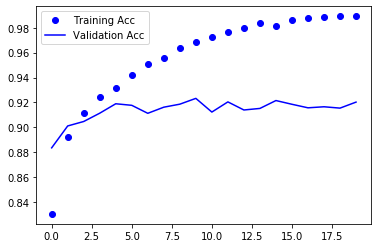

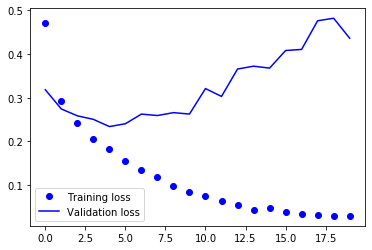

In [63]:
plt.plot(epochs, accuracy, 
         'bo',label='Training Acc')
plt.plot(epochs, val_accuracy, 
         'b',label='Validation Acc')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 
         'bo',label='Training loss')
plt.plot(epochs, val_loss, 
         'b',label='Validation loss')
plt.legend()

plt.show()

In [64]:
#dropout(드롭아웃):오버피팅 줄이는 방법
#학습 노드(뉴런, 퍼셉트론)의 일부(랜덤)를 
#학습에서 제외

fModel=Sequential() #모델 생성

fModel.add(Conv2D(32, kernel_size=(3,3), 
                  activation='linear',padding='same',
                  input_shape=(28,28,1))) #모델에 컨볼루셔널 계층을 추가
fModel.add(LeakyReLU(alpha=0.1)) #비선형 의사 결정
fModel.add(MaxPooling2D((2,2), padding='same'))
fModel.add(Dropout(0.25))

fModel.add(Conv2D(64, kernel_size=(3,3), 
                  activation='linear',padding='same')) #모델에 컨볼루셔널 계층을 추가
fModel.add(LeakyReLU(alpha=0.1)) #비선형 의사 결정
fModel.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fModel.add(Dropout(0.25))

fModel.add(Conv2D(128, kernel_size=(3,3), 
                  activation='linear',padding='same')) #모델에 컨볼루셔널 계층을 추가
fModel.add(LeakyReLU(alpha=0.1)) #비선형 의사 결정
fModel.add(MaxPooling2D((2,2), padding='same'))
fModel.add(Dropout(0.4))

fModel.add(Flatten())

fModel.add(Dense(128, activation='linear'))
fModel.add(LeakyReLU(alpha=0.1)) #비선형 의사 결정
fModel.add(Dropout(0.3))

fModel.add(Dense(num_classes, activation='softmax'))

In [68]:
fModel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
fTrainDropout=fModel.fit(trainX,trainLabel,batch_size=batch_size,epochs=epochs,validation_data=(validX,validLabel))

Epoch 1/20
750/750 [==============================] - 41s 55ms/step - loss: 0.6053 - accuracy: 0.7750 - val_loss: 0.3554 - val_accuracy: 0.8691
Epoch 2/20
750/750 [==============================] - 40s 53ms/step - loss: 0.3763 - accuracy: 0.8626 - val_loss: 0.3060 - val_accuracy: 0.8853
Epoch 3/20
750/750 [==============================] - 41s 55ms/step - loss: 0.3271 - accuracy: 0.8788 - val_loss: 0.2839 - val_accuracy: 0.8949
Epoch 4/20
750/750 [==============================] - 44s 59ms/step - loss: 0.2999 - accuracy: 0.8889 - val_loss: 0.2615 - val_accuracy: 0.9029
Epoch 5/20
750/750 [==============================] - 52s 69ms/step - loss: 0.2812 - accuracy: 0.8948 - val_loss: 0.2559 - val_accuracy: 0.9051
Epoch 6/20
750/750 [==============================] - 42s 55ms/step - loss: 0.2691 - accuracy: 0.8996 - val_loss: 0.2401 - val_accuracy: 0.9096
Epoch 7/20
750/750 [==============================] - 44s 58ms/step - loss: 0.2586 - accuracy: 0.9046 - val_loss: 0.2366 - val_accuracy:

In [69]:
fModel.save("fModelDropout.h5")
#모델 저장하기 : 케라스 에서는 모델 저장시 확장자를 h5 or h5py를 씁니다

In [70]:
testEval=fModel.evaluate(testX,testYoneHot)
print(testEval[0])
print(testEval[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.2271 - accuracy: 0.9186
0.22708581387996674
0.9186000227928162


In [77]:
predictedClasses=fModel.predict(testX)

In [80]:
predictedClasses=np.argmax(np.round(
    predictedClasses),axis=1)

In [89]:
np.where(predictedClasses==testY)


(array([   0,    1,    2, ..., 9996, 9997, 9998], dtype=int64),)

In [101]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [102]:
print(predictedClasses) #우리의 모델 예측한 결과
print(testY) # 정답
correct=np.where(predictedClasses==testY)[0]
correct

[9 2 1 ... 8 1 7]
[9 2 1 ... 8 1 5]


array([   0,    1,    2, ..., 9996, 9997, 9998], dtype=int64)

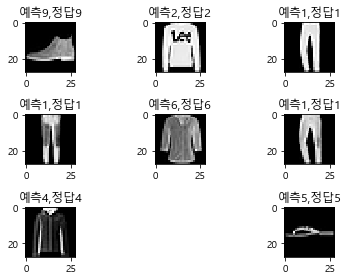

In [103]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(testX[correct].reshape(28,28),
              cmap='gray')
    plt.title("예측{},정답{}".format
              (predictedClasses[correct],
               testY[correct]))
    plt.tight_layout()

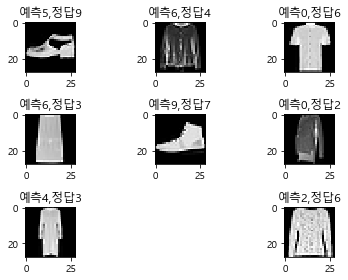

In [104]:
incorrect=np.where(predictedClasses!=testY)[0]
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(testX[incorrect].reshape(28,28),
              cmap='gray')
    plt.title("예측{},정답{}".format
              (predictedClasses[incorrect],
               testY[incorrect]))
    plt.tight_layout()